In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation as animation
from datetime import datetime

In [5]:
PATH_LOAD = "Next_Generation_Simulation__NGSIM__Vehicle_Trajectories_and_Supporting_Data.csv"
df = pd.read_csv(PATH_LOAD)

In [3]:
print(df.shape)
df.head(5)

(11850526, 25)


,Vehicle_ID,Frame_ID,Total_Frames,Global_Time,Local_X,Local_Y,Global_X,Global_Y,v_length,v_Width,...,D_Zone,Int_ID,Section_ID,Direction,Movement,Preceding,Following,Space_Headway,Time_Headway,Location
0,2,13,437,1118846980200,16.467,35.381,6451137.641,1873344.962,14.5,4.9,...,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,us-101
1,2,14,437,1118846980300,16.447,39.381,6451140.329,1873342.000,14.5,4.9,...,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,us-101
2,2,15,437,1118846980400,16.426,43.381,6451143.018,1873339.038,14.5,4.9,...,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,us-101
3,2,16,437,1118846980500,16.405,47.380,6451145.706,1873336.077,14.5,4.9,...,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,us-101
4,2,17,437,1118846980600,16.385,51.381,6451148.395,1873333.115,14.5,4.9,...,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,us-101


### Data Cleaning

In [87]:
# 1. Filter out the columns that are not related to our project

colToKeep = ['Vehicle_ID', 'Global_Time', 'Local_X', 'Local_Y', 'v_Vel', 'Lane_ID', 'Movement', 'Location']
df1 = df.loc[:, colToKeep]

In [88]:
# 2. Sort by Gobal_Time and transform it to Real_Time

df2 = df1.sort_values(by = ['Global_Time'])
timeList = [datetime.fromtimestamp(i/1000).strftime("%Y-%m-%d %H:%M:%S.%f")[:-5] for i in list(df2['Global_Time'])]

In [89]:
# 3. Add Real_Time to the dataframe and re-arrange the columns' order

df3 = df2
df3.loc[:, 'Real_Time'] = timeList
colToKeepNew = colToKeep.copy()
colToKeepNew.insert(2, 'Real_Time')
print(colToKeepNew)
df3 = df3[colToKeepNew]
print(df3.shape)
df3.head()

['Vehicle_ID', 'Global_Time', 'Real_Time', 'Local_X', 'Local_Y', 'v_Vel', 'Lane_ID', 'Movement', 'Location']
(11850526, 9)


,Vehicle_ID,Global_Time,Real_Time,Local_X,Local_Y,v_Vel,Lane_ID,Movement,Location
5457044,2,1163019100,1970-01-14 06:03:39.1,34.735,2014.005,0.00,2,1.0,peachtree
5457077,11,1163019100,1970-01-14 06:03:39.1,40.898,2001.335,14.99,1,2.0,peachtree
5457078,11,1163019200,1970-01-14 06:03:39.2,39.350,2001.109,14.99,0,2.0,peachtree
5457045,2,1163019200,1970-01-14 06:03:39.2,34.762,2015.005,0.00,0,1.0,peachtree
5457079,11,1163019300,1970-01-14 06:03:39.3,37.817,2000.878,14.99,0,2.0,peachtree


In [90]:
# A help function to check whether the timeline section for the location is continous or not

def checkTimeContinue(df, start = 0, end = df.shape[0] - 1):
    dfNew = df.iloc[start:end, :]
    time1 = dfNew.iloc[0, :]['Global_Time']
    time2 = dfNew.iloc[dfNew.shape[0] - 1, :]['Global_Time']
    timeCount1 = len(dfNew.groupby(['Global_Time']).size())
    timeCount2 = (time2 - time1)/100 + 1

    if timeCount1 == timeCount2:
        return True
    else:
        return False
    
# A help function to check the time length for the location is correct

timeLen = len(str(df.loc[:, 'Global_Time'].tolist()[0]))

def checkTimeLen(df):
    for t in df.loc[:, 'Global_Time'].tolist():
        if len(str(t)) == timeLen:
            return True
        else:
            return False

In [91]:
# 4. Check the data of each location is usable for our project

df101 = df3[df3['Location'] == 'us-101']
df80 = df3[df3['Location'] == 'i-80']
dfPea = df3[df3['Location'] == 'peachtree']
dfLan = df3[df3['Location'] == 'lankershim']

locList = [df101, df80, dfPea, dfLan]

for loc in locList:
    print(checkTimeContinue(loc) & checkTimeLen(loc))

True
False
False
True


### Data Understanding (Continue)

In [92]:
# What is the Lane_ID for location us-101 and lankershim

print(df101.groupby(['Lane_ID']).size().index)
print(dfLan.groupby(['Lane_ID']).size().index)

# What is the timespan for location us-101 and lankershim
time101_1 = df101.iloc[0, :]['Global_Time']
time101_2 = df101.iloc[df101.shape[0] - 1, :]['Global_Time']
print(datetime.fromtimestamp(time101_1/1000).strftime("%Y-%m-%d %H:%M:%S.%f")[:-5])
print(datetime.fromtimestamp(time101_2/1000).strftime("%Y-%m-%d %H:%M:%S.%f")[:-5])

timeLan_1 = dfLan.iloc[0, :]['Global_Time']
timeLan_2 = dfLan.iloc[dfLan.shape[0] - 1, :]['Global_Time']
print(datetime.fromtimestamp(timeLan_1/1000).strftime("%Y-%m-%d %H:%M:%S.%f")[:-5])
print(datetime.fromtimestamp(timeLan_2/1000).strftime("%Y-%m-%d %H:%M:%S.%f")[:-5])

Int64Index([1, 2, 3, 4, 5, 6, 7, 8], dtype='int64', name='Lane_ID')
Int64Index([0, 1, 2, 3, 4, 11, 12, 31, 101], dtype='int64', name='Lane_ID')
2005-06-15 10:49:39.7
2005-06-15 11:35:52.2
2005-06-16 11:28:00.2
2005-06-16 12:02:27.0


### Data Output

In [93]:
colToKeepNew2 = colToKeepNew.copy()
colToKeepNew2.remove('Location')

df101_2 = df101[colToKeepNew2]
df101_2 = df101_2.reset_index(drop=True)
df101_2.to_csv('us-101.csv')

dfLan_2 = dfLan[colToKeepNew2]
dfLan_2 = dfLan_2.reset_index(drop=True)
dfLan_2.to_csv('lankershim.csv')

### Data Plotting (Sample)

In [99]:
# A help function to plot the situation when maxNum cars running together in the location

def plotMaxNumCars(df):
    
    # What is the max/min number of cars at the same time
    maxNum = df.groupby('Global_Time').size().max()
    minNum = df.groupby('Global_Time').size().min()
    
    location = df.loc[:, 'Location'].tolist()[0]

    print('There are at most', maxNum, 'cars running on the road', location, 'at the same time.')
    print('There are at least', minNum, 'cars running on the road', location, 'at the same time.')

    # How long does these cars run together
    timeAndCarNumber = df.groupby('Global_Time').size()
    timeListOfMaxNum = timeAndCarNumber[timeAndCarNumber == maxNum].index

    print(maxNum, 'cars run at the same time for', len(timeListOfMaxNum)/10, 'seconds.' )

    # Plot the situation when maxNum cars run together

    # Select the first frame
    time0 = timeListOfMaxNum[0]

    # Get the x, y coordinates of these cars
    dfTime0 = df[df['Global_Time'] == time0]
    carLocList = [[x, y] for x, y in zip(dfTime0.loc[:, 'Local_X'], dfTime0.loc[:, 'Local_Y'])]

    # Plot the situation
    plt.scatter(*zip(*carLocList))
    plt.title('Situation when max number of cars running together in ' + location)
    plt.xlabel("X Location")
    plt.ylabel("Y Location")
    plt.show()

There are at most 396 cars running on the road us-101 at the same time.
There are at least 1 cars running on the road us-101 at the same time.
396 cars run at the same time for 0.1 seconds.


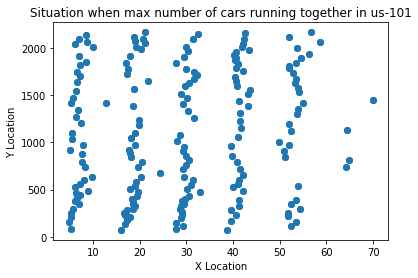

In [100]:
plotMaxNumCars(df101)

There are at most 141 cars running on the road lankershim at the same time.
There are at least 1 cars running on the road lankershim at the same time.
141 cars run at the same time for 0.3 seconds.


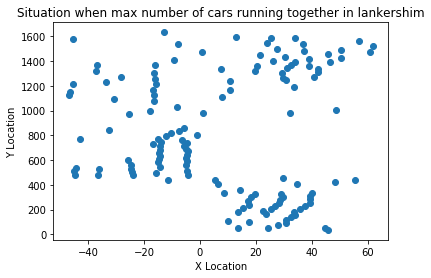

In [101]:
plotMaxNumCars(dfLan)

In [105]:
# Visualize the car's track (ID = 2)
dfID2 = df101[df101['Vehicle_ID'] == 2]
dfID2

,Vehicle_ID,Global_Time,Real_Time,Local_X,Local_Y,v_Vel,Lane_ID,Movement,Location
0,2,1118846980200,2005-06-15 10:49:40.2,16.467,35.381,40.00,2,NaN,us-101
1,2,1118846980300,2005-06-15 10:49:40.3,16.447,39.381,40.00,2,NaN,us-101
2,2,1118846980400,2005-06-15 10:49:40.4,16.426,43.381,40.00,2,NaN,us-101
3,2,1118846980500,2005-06-15 10:49:40.5,16.405,47.380,40.00,2,NaN,us-101
4,2,1118846980600,2005-06-15 10:49:40.6,16.385,51.381,40.00,2,NaN,us-101
5,2,1118846980700,2005-06-15 10:49:40.7,16.364,55.381,40.00,2,NaN,us-101
6,2,1118846980800,2005-06-15 10:49:40.8,16.344,59.381,40.00,2,NaN,us-101
7,2,1118846980900,2005-06-15 10:49:40.9,16.323,63.379,40.02,2,NaN,us-101
8,2,1118846981000,2005-06-15 10:49:41.0,16.303,67.383,40.03,2,NaN,us-101
9,2,1118846981100,2005-06-15 10:49:41.1,16.282,71.398,39.93,2,NaN,us-101


In [22]:
# CarTrack2 = [[x, y] for x, y in zip(dfID2.loc[:, 'Local_X'], dfID2.loc[:, 'Local_Y'])]
CarTrack2 = [[0,0], [1,1], [2,2]]
x = []
y = []
for i in range(len(CarTrack2)):
    x.append(CarTrack2[i][0])
    y.append(CarTrack2[i][1])

CarTrack3 = []
x1 = []
y1 = []

def update_plot(t):
    x1.append(x[0])
    y1.append(y[0])
    x.pop(0)
    y.pop(0)

In [1]:
fig, ax = plt.subplots() 
pic = ax.scatter(x1,y1) 

ani = animation.FuncAnimation(fig, update_plot)
plt.show()

NameError: name 'plt' is not defined

In [18]:
print(*zip(*CarTrack2))

(1, 2) (1, 2)


In [119]:
time_count = len(dfID2)
time_count



1758

In [120]:
colors = np.arange(1, 6)
colors

x = np.arange(0, 50) 

array([1, 2, 3, 4, 5])

In [116]:

time_count = len(df_Bubble) 
colors = np.arange(1, 6) 
x = np.arange(1, 6) 
max_radius = 25 
fig, ax = plt.subplots() 
pic = ax.scatter(x, df_Bubble.iloc[0, 1:], s=100, c=colors) 
pic.set_offsets([[np.nan]*len(colors)]*2)
ax.axis([0,7,0,7])

def init(): 
    pic.set_offsets([[np.nan]*len(colors)]*2)
    return pic,

def updateData(i): 
    y = df_Bubble.iloc[i, 1:] 
    area = np.pi * (max_radius * y / 10.0) ** 2 
    pic.set_offsets([x, y.values]) 
    pic._sizes = area
    i+=1 
    return pic, 

ani = animation.FuncAnimation(fig, updateData, frames=10, interval = 50, blit=True, init_func=init) 

plt.show()

ValueError: Points must be Nx2 array, got 2x5

ValueError: Points must be Nx2 array, got 2x5

<Figure size 432x288 with 1 Axes>

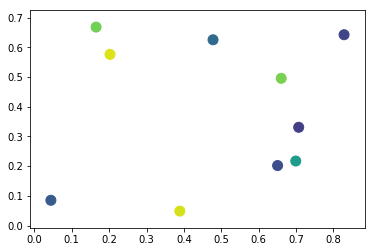

In [126]:
def main():
    numframes = 100
    numpoints = 10
    color_data = np.random.random((numframes, numpoints))
    x, y, c = np.random.random((3, numpoints))

    fig = plt.figure()
    scat = plt.scatter(x, y, c=c, s=100)

    ani = animation.FuncAnimation(fig, update_plot, frames=range(numframes),
                                  fargs=(color_data, scat))
    plt.show()

def update_plot(i, data, scat):
    scat.set_array(data[i])
    return scat,

main()

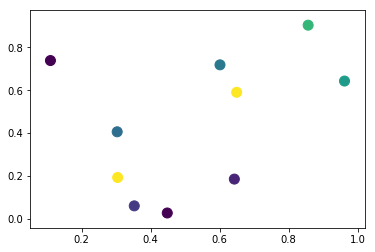

In [141]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation

def main():
    numframes = 100
    numpoints = 10
    color_data = np.random.random((numframes, numpoints))
    x, y, c = np.random.random((3, numpoints))

    fig = plt.figure()
    scat = plt.scatter(x, y, c=c, s=100)

    ani = animation.FuncAnimation(fig, update_plot, frames=range(numframes), fargs=(color_data, scat))
    plt.show()

def update_plot(i, data, scat):
    scat.set_array(data[i])
    return scat,

main()

In [139]:
range(4)

range(0, 4)

In [3]:
PATH_LOAD = "us-101.csv"
df = pd.read_csv(PATH_LOAD)

In [4]:
xList = df['Local_X'].tolist()
yList = df['Local_Y'].tolist()
yList

[39.154,
 43.153,
 47.154,
 51.154,
 55.153,
 35.381,
 59.154,
 63.154,
 39.381,
 43.381,
 67.154,
 71.154,
 47.38,
 51.381,
 75.154,
 55.381,
 79.153,
 59.381,
 83.194,
 63.379,
 87.155,
 67.383,
 90.947,
 71.398,
 35.842,
 94.675,
 98.467,
 75.40100000000002,
 39.841,
 102.428,
 43.841,
 79.34899999999998,
 106.466,
 47.341,
 83.23299999999998,
 50.841,
 110.47,
 87.04299999999998,
 54.608,
 114.487,
 90.829,
 58.333,
 118.497,
 94.683,
 98.611,
 38.476,
 122.448,
 62.034,
 102.56,
 126.254,
 65.694,
 42.976000000000006,
 47.476000000000006,
 129.947,
 69.312,
 106.385,
 72.86,
 110.079,
 51.976000000000006,
 49.74100000000001,
 133.496,
 76.358,
 56.476000000000006,
 113.628,
 53.742,
 136.986,
 60.976000000000006,
 140.468,
 79.843,
 57.74100000000001,
 117.118,
 143.964,
 61.74100000000001,
 120.6,
 83.355,
 65.476,
 124.096,
 86.84200000000001,
 69.976,
 65.742,
 147.465,
 74.476,
 90.258,
 34.445,
 127.597,
 150.965,
 69.741,
 73.741,
 78.988,
 37.945,
 154.465,
 131.099,
 93.64

Frames: 0


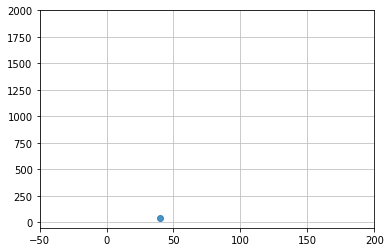

In [7]:
fig = plt.figure()

x= [0] # start point
y= [0]


def _update_plot(i, fig, scat):
    scat.set_offsets(([xList[i],yList[i]]))
    print('Frames: %d' %i)
    return scat,


ax= fig.add_subplot(111)
ax.grid(True, linestyle = '-', color = '0.75')
ax.set_xlim([-50, 200])
ax.set_ylim([-50, 2000])

scat = plt.scatter(x, y)
scat.set_alpha(0.8)

anim = animation.FuncAnimation(fig, _update_plot,fargs = (fig, scat), frames =100, interval =100)

plt.show()